Import the 🦸🏾‍♀️"Avengers"🦹🏻 data from the [FiveThirtyEight data repository on GitHub](https://github.com/fivethirtyeight/data/blob/master/avengers/avengers.csv).

In [2]:
library ('tidyverse')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [3]:
avengers = read_csv (
    'https://raw.githubusercontent.com/fivethirtyeight/data/master/avengers/avengers.csv', col_types =cols())
avengers |> head (2)

URL,Name/Alias,Appearances,Current?,Gender,Probationary Introl,Full/Reserve Avengers Intro,Year,Years since joining,Honorary,⋯,Return1,Death2,Return2,Death3,Return3,Death4,Return4,Death5,Return5,Notes
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
http://marvel.wikia.com/Henry_Pym_(Earth-616),"Henry Jonathan ""Hank"" Pym",1269,YES,MALE,NA,Sep-63,1963,52,Full,⋯,NO,NA,NA,NA,NA,NA,NA,NA,NA,Merged with Ultron in Rage of Ultron Vol. 1. A funeral was held.
http://marvel.wikia.com/Janet_van_Dyne_(Earth-616),Janet van Dyne,1165,YES,FEMALE,NA,Sep-63,1963,52,Full,⋯,YES,NA,NA,NA,NA,NA,NA,NA,NA,Dies in Secret Invasion V1:I8. Actually was sent tto Microverse later recovered


Make an ECDF plot 📊 of `Appearances`.

In [6]:
avengers2 = avengers |>
    mutate(ypos = rank(Appearances, ties.method = 'first')/ n()) |>
    select (`Name/Alias`, Appearances, ypos) |>
    arrange (desc(ypos))
   
avengers2 |> head (6)

Name/Alias,Appearances,ypos
<chr>,<dbl>,<dbl>
Peter Benjamin Parker,4333,1.0000000
Steven Rogers,3458,0.9942197
"James ""Logan"" Howlett",3130,0.9884393
"Anthony Edward ""Tony"" Stark",3068,0.9826590
Thor Odinson,2402,0.9768786
Benjamin Jacob Grimm,2305,0.9710983


In [9]:
avengers3 = avengers |>
    select (`Name/Alias`, Appearances) |>
    arrange (Appearances) |>
    mutate (ypos = row_number ()/n()) 
   
avengers3 |> head (6)

Name/Alias,Appearances,ypos
<chr>,<dbl>,<dbl>
Moira Brandon,2,0.005780347
Fiona,2,0.011560694
Doug Taggert,3,0.017341040
Gene Lorrene,4,0.023121387
Dennis Sykes,6,0.028901734
NA,7,0.034682081


(❗️Hint: combine `arrange`, `mutate` and `row_number`/`rank` to produce a new column to encode with y-position.)

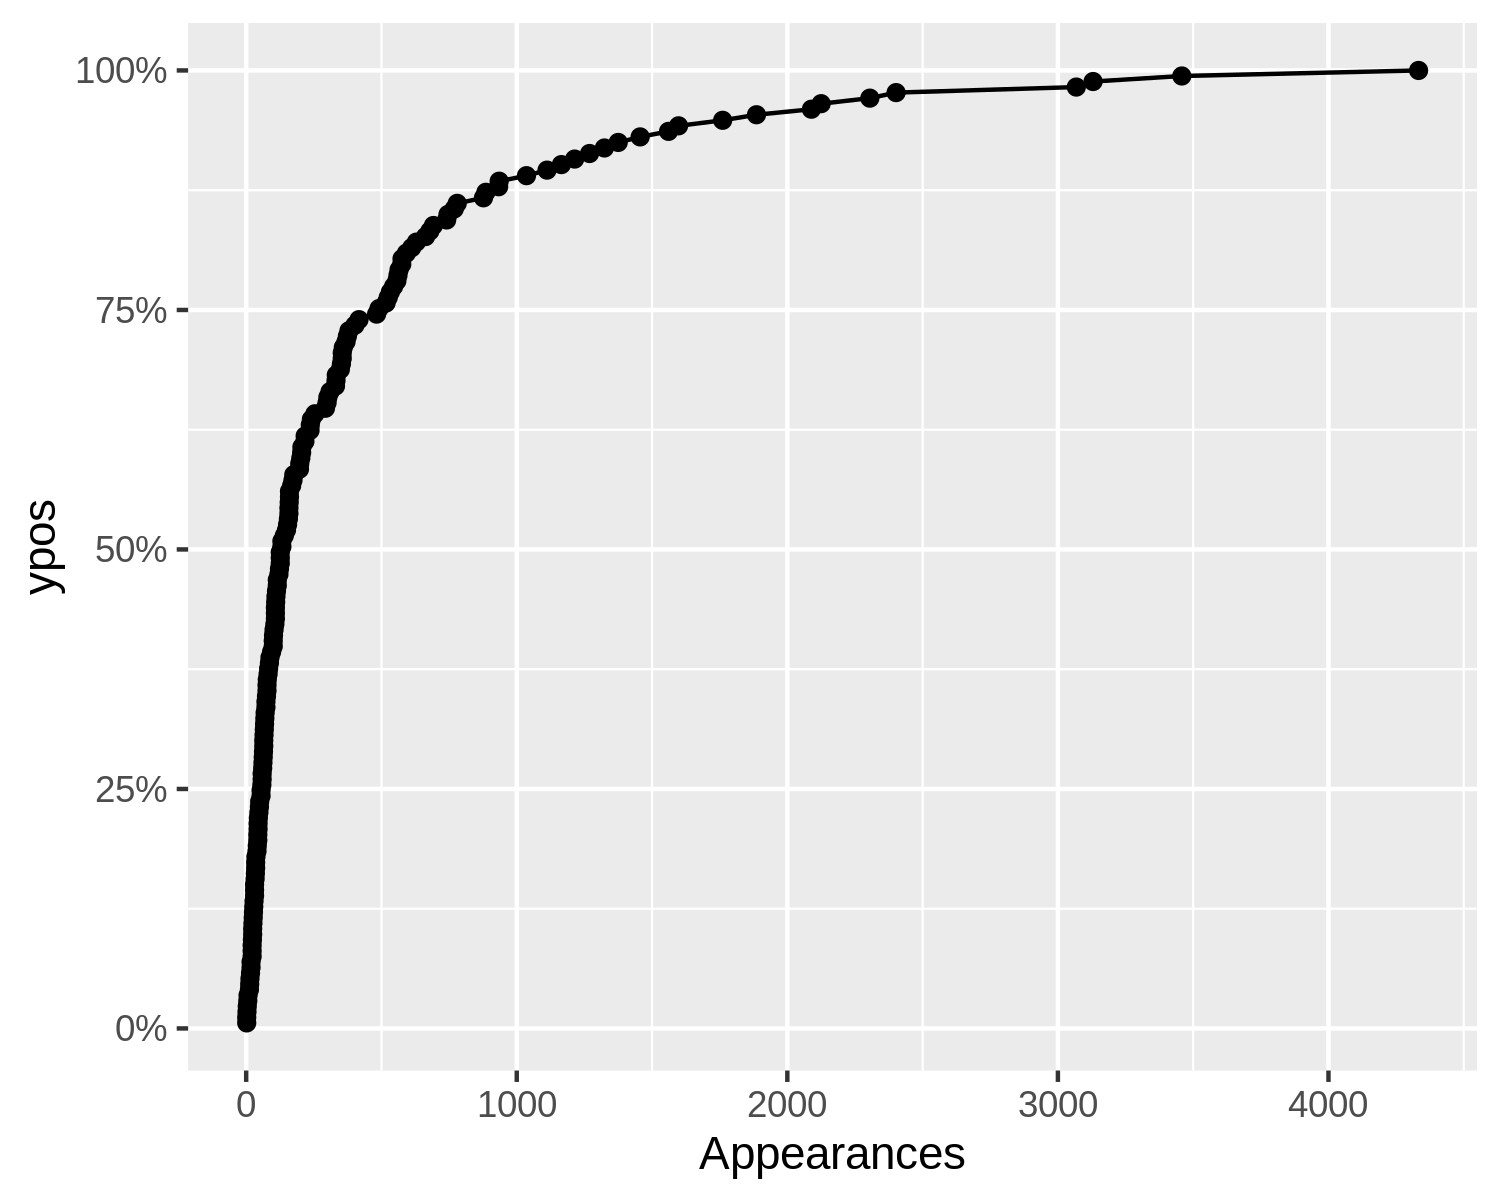

In [11]:
p = ggplot (avengers3, aes (x=Appearances, y=ypos)) + 
    geom_line () + geom_point () +
    scale_y_continuous (labels = scales::percent_format())

p

In [12]:
avengers3 |>
    filter (ypos > 0.80, ypos< 0.85)


Name/Alias,Appearances,ypos
<chr>,<dbl>,<dbl>
Samuel Thomas Wilson,576,0.8034682
Alex Summers,592,0.8092486
Richard Milhouse Jones,612,0.8150289
Daniel Thomas Rand K'ai,629,0.8208092
James Buchanan Barnes,663,0.8265896
Samuel Guthrie,679,0.8323699
Simon Williams,692,0.8381503
Heracles,741,0.8439306
Flash Thompson,746,0.8497110


In [13]:
highlight = avengers3 |> filter (`Name/Alias` == 'James Buchanan Barnes')

In [14]:
library ('ggrepel')

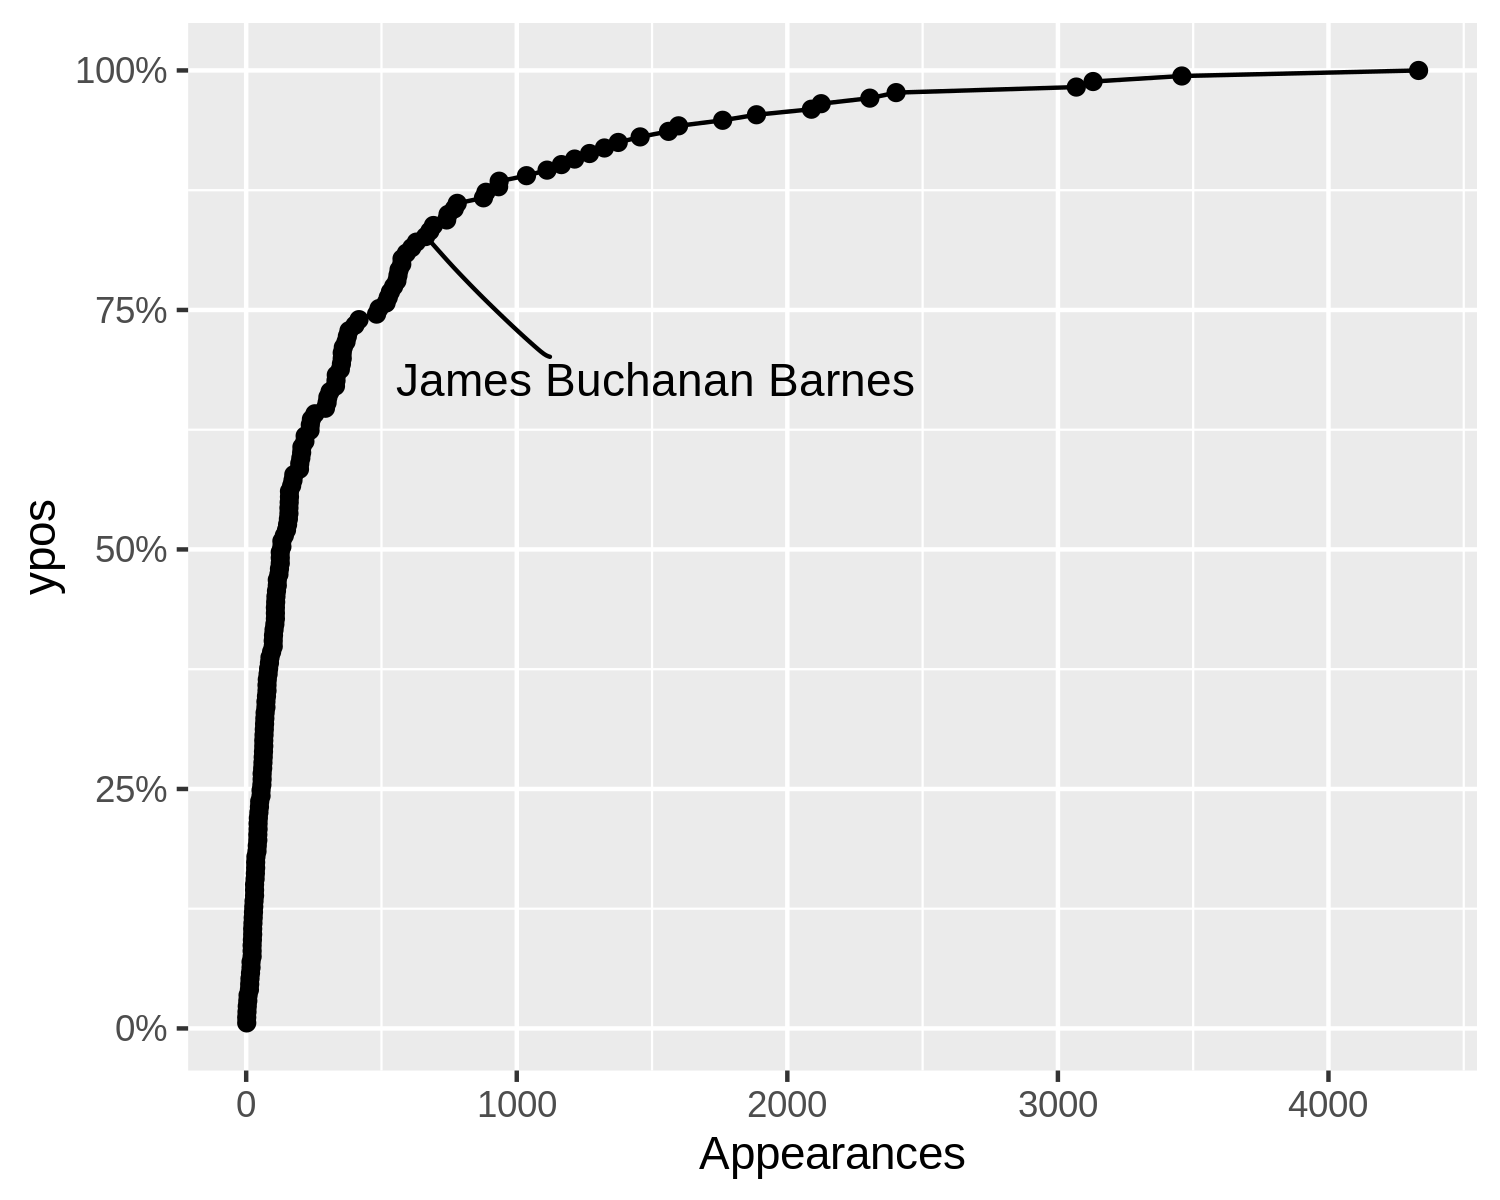

In [16]:
p = ggplot (avengers3, aes (x=Appearances, y=ypos)) + 
    geom_line () + geom_point () +
    geom_text_repel (
        data = highlight,
        mapping = aes (label = `Name/Alias`),
        hjust = 0,
        nudge_x = 0.5,
        nudge_y = -0.15,
        box.padding = 0.5,
        segment.curvature = -0.1,
        segment.ncp = 3,
        segment.angle = 20
    ) +
        
    scale_y_continuous (labels = scales::percent_format())

p